# Email Dataset Statistics Visualization

This notebook provides comprehensive visualizations of the Email-Todo-List dataset statistics.

**Datasets:**
- Enron Email Dataset (~517k corporate emails)
- Spam Assassin Public Corpus (~4.2k legitimate emails)

**Sections:**
1. Overall Dataset Statistics (Before vs After Preprocessing)
2. Enron Dataset Visualizations
3. SpamAssassin Dataset Visualizations
4. Combined Dataset Analysis
5. Text Analysis (Word Clouds)

## Setup and Imports


In [26]:
import json
import pickle
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from collections import Counter

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Configure matplotlib
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

print("✓ Libraries imported successfully")


✓ Libraries imported successfully


## Load Processed Statistics

In [27]:
# Define paths (from src/analysis/ going up 2 levels to project root)
base_dir = Path('../..').absolute()
data_dir = base_dir / 'Data'
processed_dir = data_dir / 'processed'

print(f"Project root: {base_dir}")
print(f"Data directory: {data_dir}")
print(f"Processed directory: {processed_dir}")

# Load processed statistics
stats_file = processed_dir / 'statistics.json'
print(f"\nLoading: {stats_file}")

with open(stats_file, 'r') as f:
    processed_stats = json.load(f)

print("\n✓ Loaded processed statistics")
print(f"  Total emails (processed): {processed_stats['total_emails']:,}")
print(f"  Unique emails: {processed_stats['unique_emails']:,}")

Project root: /Users/ethansandoval/Desktop/CS159 - Natural Language Processing/Email-Todo-List/src/analysis/../..
Data directory: /Users/ethansandoval/Desktop/CS159 - Natural Language Processing/Email-Todo-List/src/analysis/../../Data
Processed directory: /Users/ethansandoval/Desktop/CS159 - Natural Language Processing/Email-Todo-List/src/analysis/../../Data/processed

Loading: /Users/ethansandoval/Desktop/CS159 - Natural Language Processing/Email-Todo-List/src/analysis/../../Data/processed/statistics.json

✓ Loaded processed statistics
  Total emails (processed): 521,267
  Unique emails: 250,676


## Calculate Raw Data Statistics


In [28]:
# Count raw SpamAssassin emails
def count_files_in_dir(directory):
    if not os.path.exists(directory):
        return 0
    return len([f for f in os.listdir(directory) if not f.startswith('.')])

easy_ham_count = count_files_in_dir(data_dir / 'easy_ham')
easy_ham2_count = count_files_in_dir(data_dir / 'easy_ham_2')
hard_ham_count = count_files_in_dir(data_dir / 'hard_ham')
total_spam_assassin_raw = easy_ham_count + easy_ham2_count + hard_ham_count

print("Raw SpamAssassin Email Counts:")
print(f"  easy_ham: {easy_ham_count:,}")
print(f"  easy_ham_2: {easy_ham2_count:,}")
print(f"  hard_ham: {hard_ham_count:,}")
print(f"  Total: {total_spam_assassin_raw:,}")

enron_raw_count = processed_stats['source_distribution']['enron']
total_raw_emails = enron_raw_count + total_spam_assassin_raw

print(f"\nRaw Enron emails: {enron_raw_count:,}")
print(f"Total raw emails: {total_raw_emails:,}")


Raw SpamAssassin Email Counts:
  easy_ham: 2,551
  easy_ham_2: 1,401
  hard_ham: 250
  Total: 4,202

Raw Enron emails: 517,065
Total raw emails: 521,267


---
# Section 1: Dataset Statistics

### 1.1 Before vs After Preprocessing


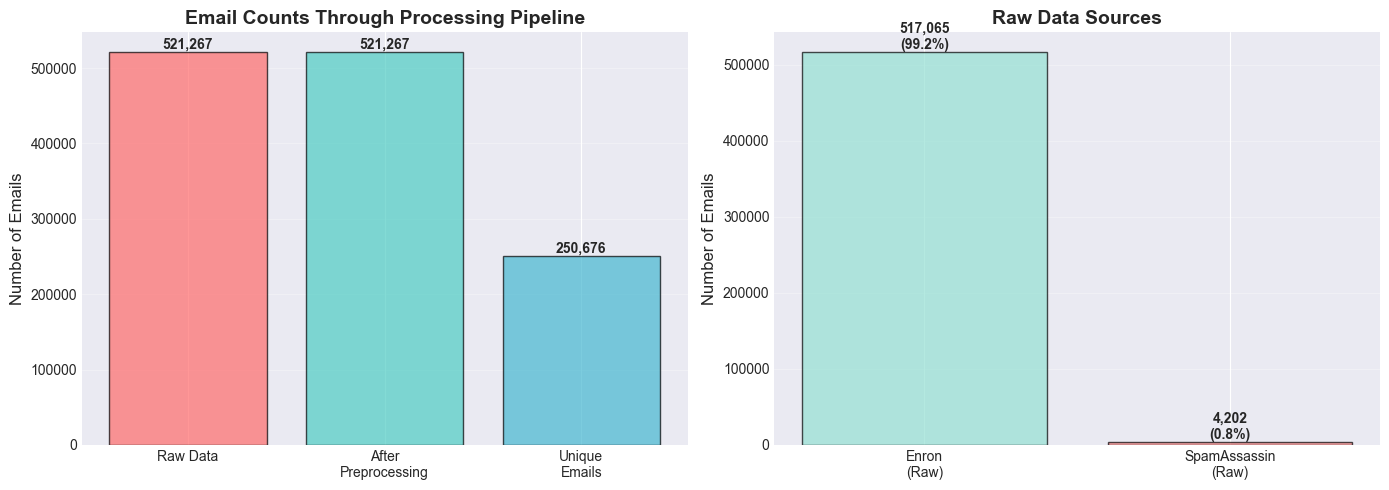

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Before vs After
stages = ['Raw Data', 'After\nPreprocessing', 'Unique\nEmails']
counts = [total_raw_emails, processed_stats['total_emails'], processed_stats['unique_emails']]
colors = ['#ff6b6b', '#4ecdc4', '#45b7d1']

bars1 = ax1.bar(stages, counts, color=colors, alpha=0.7, edgecolor='black')
ax1.set_ylabel('Number of Emails')
ax1.set_title('Email Counts Through Processing Pipeline', fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height, f'{int(height):,}',
            ha='center', va='bottom', fontweight='bold')

# Sources
sources = ['Enron\n(Raw)', 'SpamAssassin\n(Raw)']
source_counts = [enron_raw_count, total_spam_assassin_raw]
bars2 = ax2.bar(sources, source_counts, color=['#95e1d3', '#f38181'], alpha=0.7, edgecolor='black')
ax2.set_ylabel('Number of Emails')
ax2.set_title('Raw Data Sources', fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

for bar in bars2:
    height = bar.get_height()
    pct = (height / total_raw_emails) * 100
    ax2.text(bar.get_x() + bar.get_width()/2., height, f'{int(height):,}\n({pct:.1f}%)',
            ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


### 1.2 Label Distribution


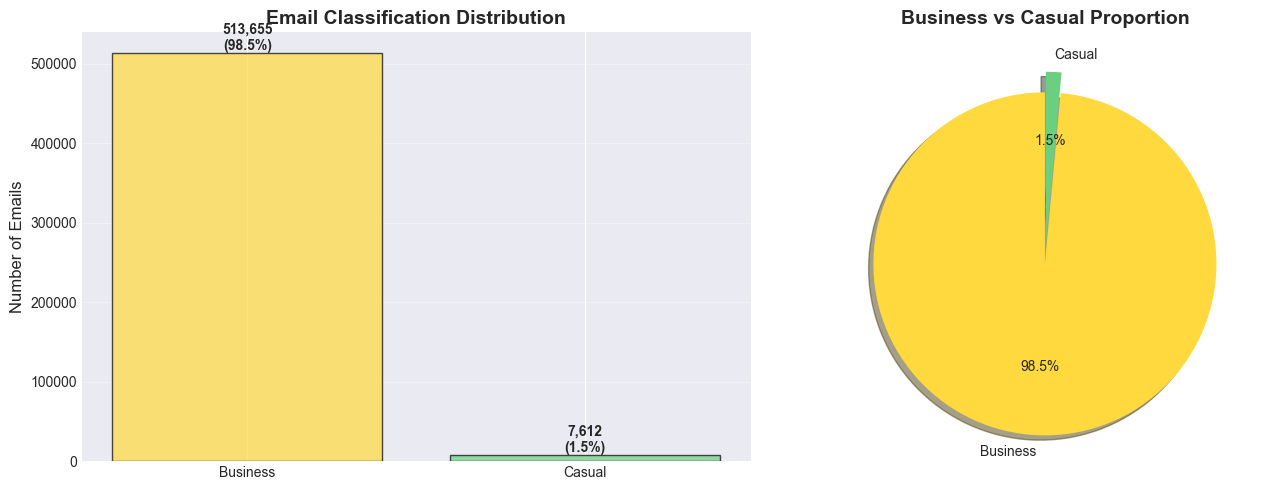


Class Imbalance: 67.5:1 (Business:Casual)


In [30]:
label_dist = processed_stats['label_distribution']
labels_map = {'0': 'Casual', '1': 'Business'}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

label_names = [labels_map[k] for k in label_dist.keys()]
label_counts = list(label_dist.values())
colors = ['#ffd93d', '#6bcf7f']

bars = ax1.bar(label_names, label_counts, color=colors, alpha=0.7, edgecolor='black')
ax1.set_ylabel('Number of Emails')
ax1.set_title('Email Classification Distribution', fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

total_labels = sum(label_counts)
for bar, count in zip(bars, label_counts):
    height = bar.get_height()
    pct = (count / total_labels) * 100
    ax1.text(bar.get_x() + bar.get_width()/2., height, f'{count:,}\n({pct:.1f}%)',
            ha='center', va='bottom', fontweight='bold')

ax2.pie(label_counts, labels=label_names, autopct='%1.1f%%', startangle=90,
        colors=colors, explode=(0.1, 0.02), shadow=True)
ax2.set_title('Business vs Casual Proportion', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nClass Imbalance: {label_dist['1'] / label_dist['0']:.1f}:1 (Business:Casual)")


---
# Section 2: Enron Folder Analysis

### 2.1 Top 30 Enron Folders


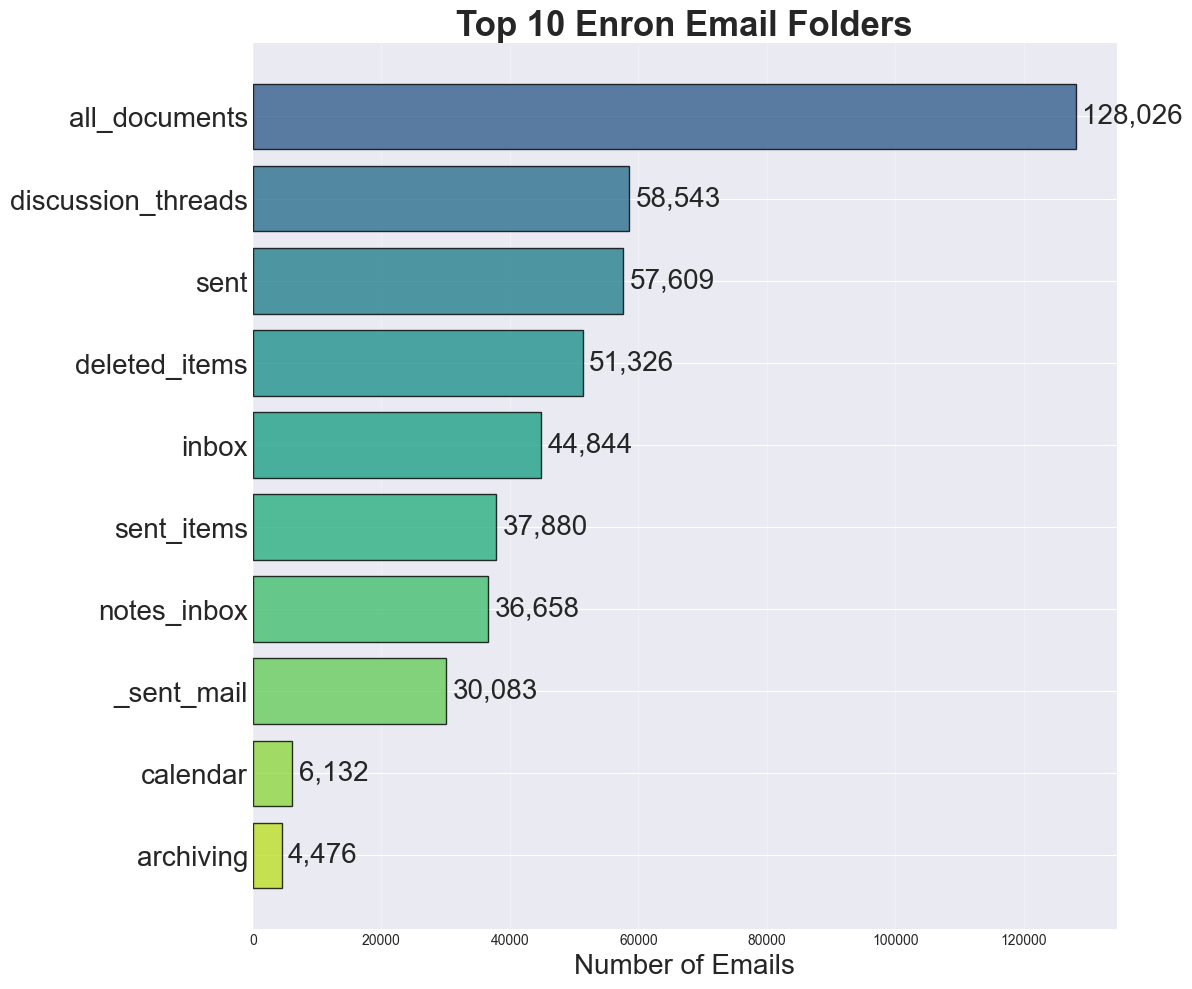

In [39]:
top_folders = processed_stats['top_enron_folders']
n = 10
folders = list(top_folders.keys())[:n]
counts = list(top_folders.values())[:n]

fig, ax = plt.subplots(figsize=(12, 10))
y_pos = np.arange(len(folders))
bars = ax.barh(y_pos, counts, color=plt.cm.viridis(np.linspace(0.3, 0.9, len(folders))), 
               edgecolor='black', alpha=0.8)

ax.set_yticks(y_pos)
ax.set_yticklabels(folders, fontsize=20)
ax.invert_yaxis()
ax.set_xlabel('Number of Emails', fontsize=20)
ax.set_title(f'Top {n} Enron Email Folders', fontweight='bold', fontsize=25)
ax.grid(axis='x', alpha=0.3)

for bar, count in zip(bars, counts):
    ax.text(count + 1000, bar.get_y() + bar.get_height()/2, f'{count:,}', va='center', fontsize=20)

plt.tight_layout()
plt.show()


### 2.2 Personal/Casual Enron Folders

Distribution of folders classified as personal/casual based on keywords during preprocessing.


Loading metadata...
Found 1427 unique folders


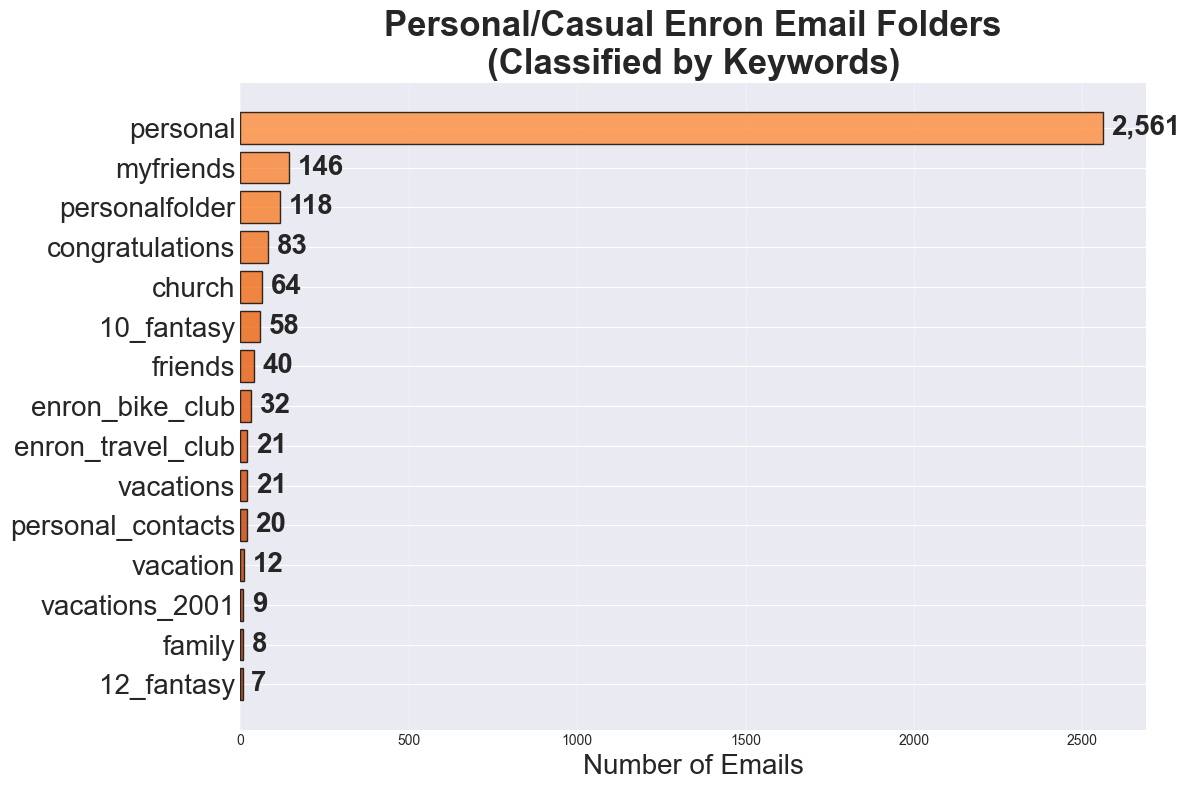


✓ Found 15 personal folders
Total personal emails: 3,200 (0.62%)


In [40]:
CASUAL_KEYWORDS = [
    'personal', 'family', 'church', 'vacation', 'holiday', 'fantasy',
    'congratulations', 'birthday', 'wedding', 'baby', 'anniversary',
    'hobby', 'sport', 'game', 'social', 'friend', 'reunion', 'party',
    'entertainment', 'leisure', 'golf', 'tennis', 'football',
    'baseball', 'soccer', 'recreation', 'club'
]

print("Loading metadata...")
metadata_file = processed_dir / 'metadata.csv'
df_metadata = pd.read_csv(metadata_file, usecols=['source', 'folder_name'])
enron_metadata = df_metadata[df_metadata['source'] == 'enron']
all_folder_counts = enron_metadata['folder_name'].value_counts().to_dict()
print(f"Found {len(all_folder_counts)} unique folders")

# Filter personal folders (with exclusions)
personal_folders = {}
exclusions = ['transport', 'transportation', 'passport']

for folder, count in all_folder_counts.items():
    folder_lower = str(folder).lower()
    if any(excl in folder_lower for excl in exclusions):
        continue
    for keyword in CASUAL_KEYWORDS:
        if keyword in folder_lower:
            personal_folders[folder] = count
            break

# Filter ≤5 emails and sort
MIN_EMAILS = 5
personal_folders_filtered = {f: c for f, c in personal_folders.items() if c > MIN_EMAILS}
personal_folders_sorted = dict(sorted(personal_folders_filtered.items(), key=lambda x: x[1], reverse=True))

# Visualize
fig, ax = plt.subplots(figsize=(12, max(8, len(personal_folders_sorted) * 0.5)))
folders_list = list(personal_folders_sorted.keys())
counts_list = list(personal_folders_sorted.values())
y_pos = np.arange(len(folders_list))

bars = ax.barh(y_pos, counts_list, 
               color=plt.cm.Oranges(np.linspace(0.5, 0.9, len(folders_list))), 
               edgecolor='black', alpha=0.8)

ax.set_yticks(y_pos)
ax.set_yticklabels(folders_list, fontsize=20)
ax.invert_yaxis()
ax.set_xlabel('Number of Emails', fontsize=20)
ax.set_title('Personal/Casual Enron Email Folders\n(Classified by Keywords)', fontweight='bold', fontsize=25)
ax.grid(axis='x', alpha=0.3)

for bar, count in zip(bars, counts_list):
    ax.text(count + max(counts_list)*0.01, bar.get_y() + bar.get_height()/2, 
            f'{count:,}', va='center', fontweight='bold', fontsize=20)

plt.tight_layout()
plt.show()

total_personal = sum(counts_list)
print(f"\n✓ Found {len(personal_folders_sorted)} personal folders")
print(f"Total personal emails: {total_personal:,} ({(total_personal/enron_raw_count)*100:.2f}%)")
